# 19기 KNN 정규세션 과제

## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

# 1. Preprcessing / EDA

## 1-1 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import random

import warnings
warnings.filterwarnings(action='ignore')

df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


## 1-2 데이터 설명

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [3]:
df.shape

(4998, 12)

In [4]:
uniq_count = {}
for i in df.columns:
    uniq_count[i] = df[i].nunique()
uniq_count

{'User_ID': 2656,
 'Product_ID': 1797,
 'Gender': 2,
 'Age': 7,
 'Occupation': 21,
 'City_Category': 3,
 'Stay_In_Current_City_Years': 5,
 'Marital_Status': 2,
 'Product_Category_1': 20,
 'Product_Category_2': 17,
 'Product_Category_3': 15,
 'Purchase': 3736}

In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.998000e+03,4998.000000,4998.000000,4998.000000,3465.000000,1544.000000,4998.000000
mean,1.003015e+06,8.036815,0.421369,5.320128,9.773737,12.766839,9234.655462
std,1.709910e+03,6.442697,0.493828,3.912281,5.101867,4.023591,4999.225081
min,1.000003e+06,0.000000,0.000000,1.000000,2.000000,3.000000,13.000000
25%,1.001560e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5497.750000
50%,1.003040e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8049.000000
75%,1.004417e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12039.000000
max,1.006037e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23913.000000


데이터의 정보를 살펴보도록 한다.  


총 12개의 변수들(unique 데이터 수)  

* User_ID : 사용자 ID(2656)
* Product_ID : 상품 ID(1797)
* Gender : 성(2)
* Age : 연령(7)
* Occupation : 직업(21)
* City_Category : 도시 종류(3)
* Stay_In_Current_City_Years : 현재 도시에 머문 년수(5)
* Marital_Status : 결혼 여부(2)
* Product_Category_1 : 상품 범주 1(20)
* Product_Category_2 : 상품 범주 2(17)
* Product_Category_3 : 상품 범주 3(15)
* Purchase - 구매량(3736)  
  
이 존재하며 4998개의 데이터들이 존재한다.  
이 데이터셋은 사용자들의 신상 정보와 BlackFriday의 상품 정보들로 이루어져 있으므로, 가장 마지막 변수인 Purchase(구매량)을 Target(반응변수)으로 설정하여 regression을 이용하는 것이 적절해보인다.  

이후 각 변수들의 type을 살펴보면  

(반응변수)
* int(수치형) - 'Purchase'  

(설명변수)
* object(범주형) - 'Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_years'  
* int or float(수치형) - 'User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3'  

로 이루어져 있음을 확인할 수 있다.

하지만 설명변수들을 자세히 살펴보면 실제 type과 해당 변수들의 데이터 종류가 다름을 알 수 있다. int와 float으로 설정된 변수들 모두 사실상 범주형 변수에 더 가깝기 때문에 이후 분석에 있어서 범주형 변수들로 인식하여 진행하기로 한다.

## 1-3 결측치 처리

In [6]:
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

결측치 개수를 확인해보면 Product_Category 2와 3에 대해서 각각 1533개, 3454개가 존재한다. 두 변수 모두 4998개의 데이터에 대해서 많은 비율을 차지한다고 생각되어 drop하기로 하였다.  

또한 User_ID(사용자 ID) 변수는 사용자의 고유 번호라고 판단하여 해당 변수 역시 drop하기로 하였다.

In [7]:
df_1 = df.drop(['User_ID','Product_Category_2', 'Product_Category_3'], axis=1)
df_1

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,P00046042,F,0-17,10,A,3,0,5,2010
1,P00347742,F,0-17,10,A,1,0,7,4483
2,P00048942,F,0-17,10,A,1,0,1,7696
3,P00145242,F,0-17,10,A,3,0,2,16429
4,P00106742,F,0-17,10,A,3,0,3,5780
...,...,...,...,...,...,...,...,...,...
4993,P00147942,M,55+,7,C,1,1,1,11701
4994,P00358242,M,55+,1,C,1,1,8,2045
4995,P00173342,M,55+,13,C,3,1,1,4505
4996,P00336742,M,55+,0,C,2,1,12,1413


## 1-4 변수 시각화

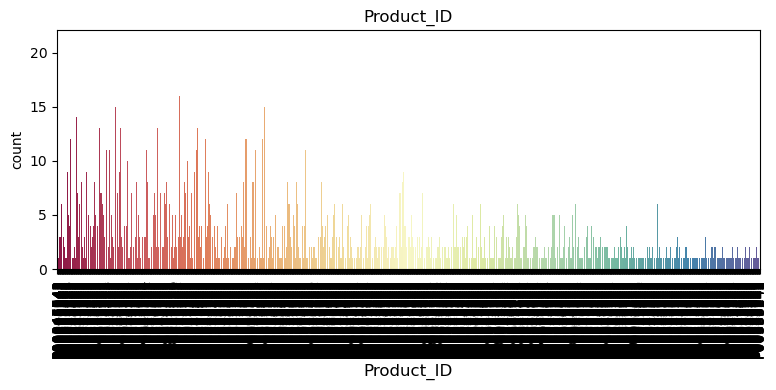

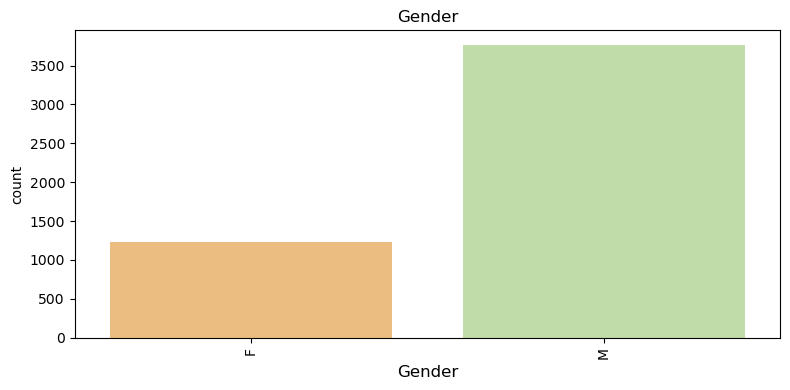

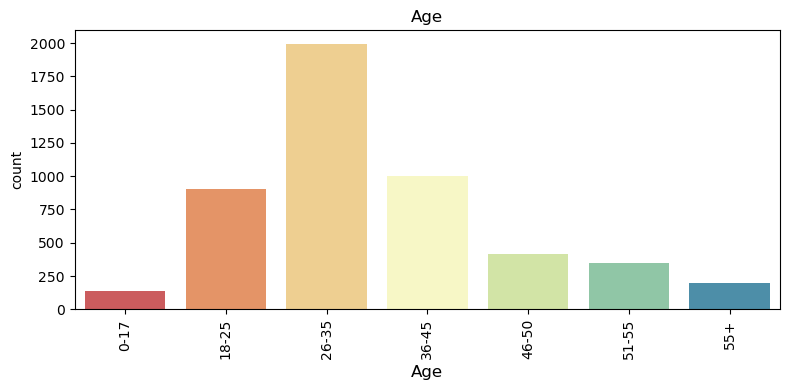

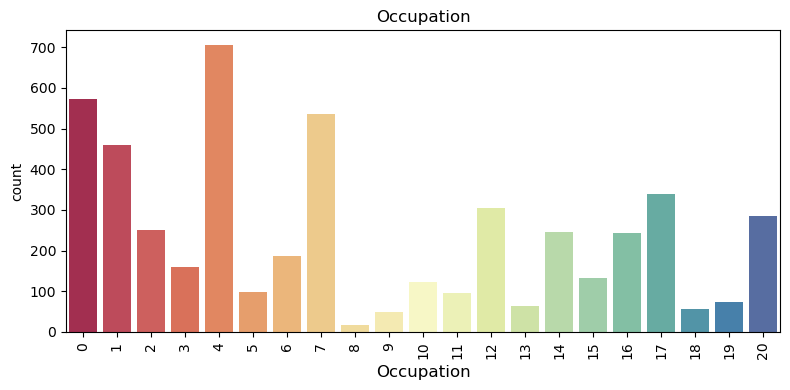

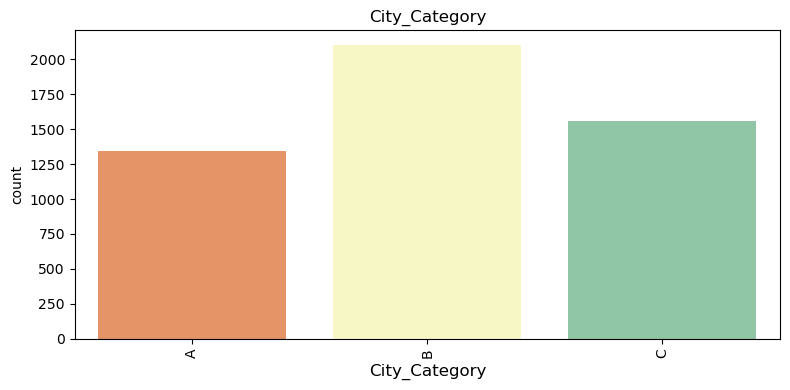

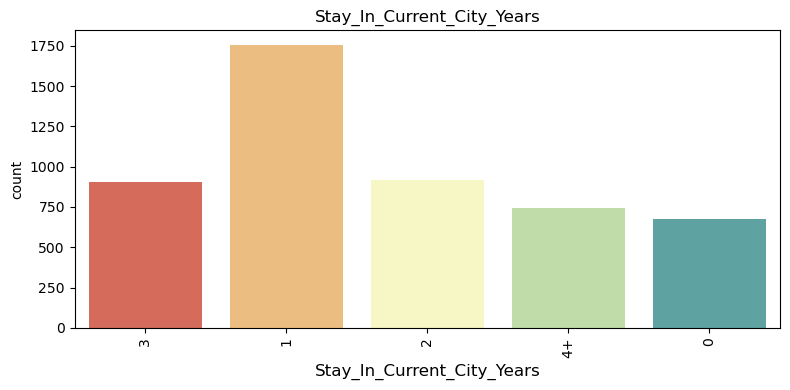

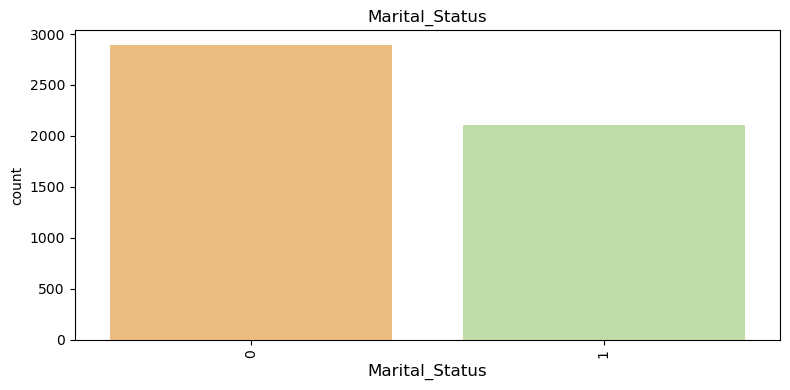

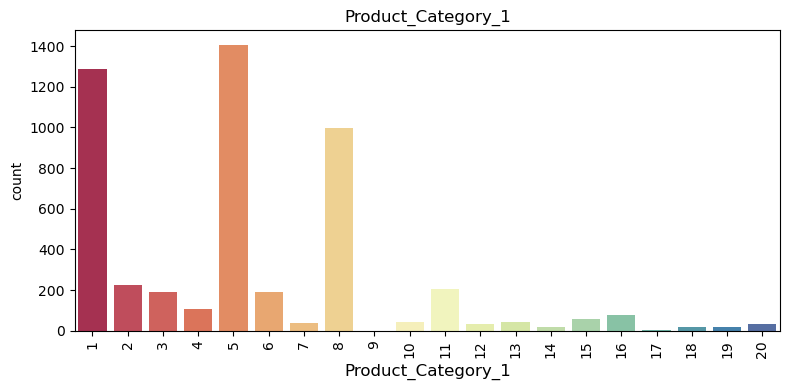

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for i, col in enumerate(list(df_1.columns)[:-1]):
    plt.figure(figsize=(8,4))
    sns.countplot(x = col, data = df_1, palette="Spectral")
    plt.title(col)
    plt.xticks(rotation = 90)
    plt.xlabel(col, size = 12)
    plt.tight_layout()

Product_ID의 unique 데이터 개수는 1797개로 상당히 많은 범주를 가지고 있고 위의 시각화 그래프에서도 이를 확인해볼 수 있다. 따라서 분석의 편리함을 위해 해당 변수의 범주를 축소시켰다.  
'Product_ID'는 상품의 ID로 P********와 같은 방식으로 ID가 이루어짐을 확인할 수 있다. 이는 각 상품별 고유 번호이고 구성 혹은 종류가 비슷한 상품끼리는 ID 역시 일부가 비슷하기 때문에 각각의 ID를 적절히 split하여 적은 범주 개수로 분류시켜줄 수 있다.

In [9]:
print(df['Product_ID'].str[0:5].unique()) # P****로 분류한 경우
print(df['Product_ID'].str[0:4].unique()) # P***로 분류한 경우

['P0004' 'P0034' 'P0014' 'P0010' 'P0005' 'P0000' 'P0011' 'P0020' 'P0031'
 'P0027' 'P0035' 'P0019' 'P0008' 'P0018' 'P0001' 'P0016' 'P0002' 'P0023'
 'P0013' 'P0037' 'P0006' 'P0003' 'P0025' 'P0017' 'P0012' 'P0015' 'P0024'
 'P0022' 'P0030' 'P0028' 'P0021' 'P0009' 'P0029' 'P0033' 'P0007' 'P0097'
 'P0026' 'P0032' 'P0099' 'P0036' 'P0096' 'P0095' 'P0098' 'P0094']
['P000' 'P003' 'P001' 'P002' 'P009']


총 4자리로 분류한 두번째의 경우에 대해서 5가지의 범주로 나눌 수 있으므로 이와 같이 Product_ID를 수정해준다.

In [10]:
df_1['Product_ID'] = df_1['Product_ID'].str[0:4]
df_1

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,P000,F,0-17,10,A,3,0,5,2010
1,P003,F,0-17,10,A,1,0,7,4483
2,P000,F,0-17,10,A,1,0,1,7696
3,P001,F,0-17,10,A,3,0,2,16429
4,P001,F,0-17,10,A,3,0,3,5780
...,...,...,...,...,...,...,...,...,...
4993,P001,M,55+,7,C,1,1,1,11701
4994,P003,M,55+,1,C,1,1,8,2045
4995,P001,M,55+,13,C,3,1,1,4505
4996,P003,M,55+,0,C,2,1,12,1413


## 1-5 범주형 변수 처리(One_Hot_Encoding)

In [11]:
from sklearn.preprocessing import OneHotEncoder

cat_columns = ['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category','Marital_Status', 'Stay_In_Current_City_Years', 'Product_Category_1']

ohe = OneHotEncoder()
ohe_fit = ohe.fit(df_1[cat_columns])

ohe_encoded = ohe_fit.transform(df_1[cat_columns]).toarray()

ohe_df_1 = pd.DataFrame(ohe_encoded, columns = ohe_fit.get_feature_names(cat_columns))
final_df = pd.concat([ohe_df_1, df_1['Purchase']], axis = 1)
final_df

,Product_ID_P000,Product_ID_P001,Product_ID_P002,Product_ID_P003,Product_ID_P009,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,...,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20,Purchase
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4483
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7696
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16429
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11701
4994,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2045
4995,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4505
4996,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1413


# 2. KNN 구현 & 파라미터 튜닝 +(Evaluation)

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

## 2-1 데이터 셋 분리

In [13]:
X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:,:-1], final_df['Purchase'], test_size=0.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3998, 65), (3998,), (1000, 65), (1000,))

## 2-2 KNN 구현(기본값으로)

In [14]:
model = KNeighborsRegressor() # 기본값, k = 5, weight = uniform, metric = minkowski(p=1 : manhatten, p=2 : euclidean)
model.fit(X_train, y_train)

print("train score: {}".format(model.score(X_train, y_train)))
print("test score: {}".format(model.score(X_test, y_test)))

train score: 0.511474997388597
test score: 0.32695677003123613


기본값을 이용한 knn을 진행해본 결과 train set과 test set에 대해 각각 0.51, 0.33의 낮은 정확도를 보였다.

## 2-3 하이퍼 파라미터 K값에 따른 KNN

In [15]:
k_list = [i for i in range(1, 50) if i%2 !=0] # 홀수만 선택
train_acc = []
test_acc = []

for k in k_list: # k_list에 따라서 각각 knn을 진행하는 for문
    reg = KNeighborsRegressor(n_neighbors = k)
    reg.fit(X_train, y_train)
    train_acc.append(reg.score(X_train,y_train))
    test_acc.append(reg.score(X_test,y_test))

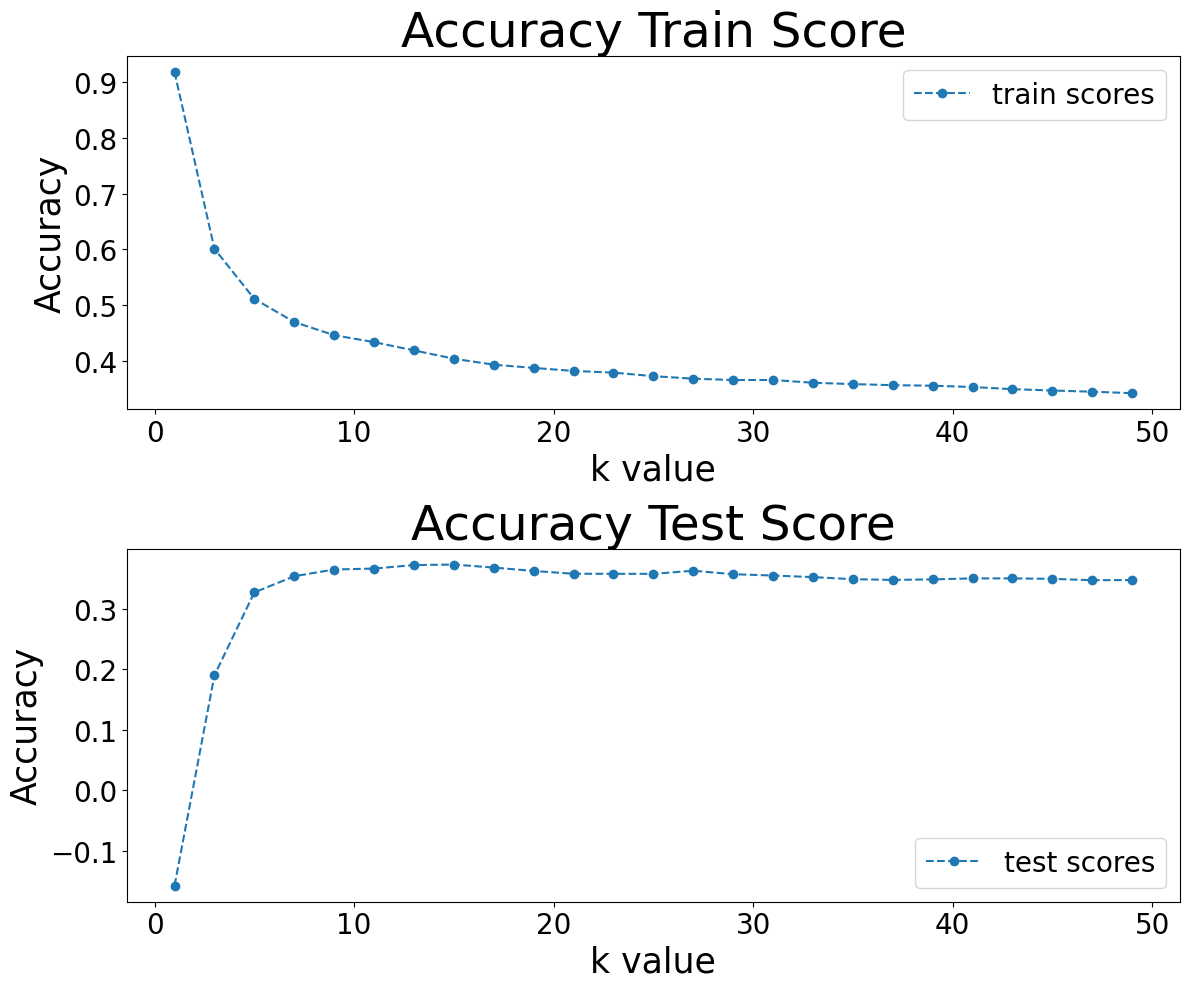

In [16]:
plt.figure(figsize=(12,10))

plt.subplot(2,1,1) # k값에 따른 train set의 accuracy 그래프
plt.plot(k_list, train_acc, marker='o', linestyle='dashed')
plt.legend(['train scores'], fontsize=20)
plt.xlabel('k value', fontsize=25)
plt.ylabel('Accuracy', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Accuracy Train Score', fontsize=35)

plt.subplot(2,1,2) # k값에 따른 test set의 accuracy 그래프
plt.plot(k_list, test_acc, marker='o', linestyle='dashed')
plt.legend(['test scores'], fontsize=20)
plt.xlabel('k value', fontsize=25)
plt.ylabel('Accuracy', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Accuracy Test Score', fontsize=35)

plt.tight_layout()
plt.show()

KNeighborsRegressor의 기본 파라미터 값에서 K값을 변화시킴에 따라 train data와 test data의 accuracy값과 그래프를 나타내보았다.  
train은 k값이 커질수록 accuracy가 지수적으로 감소하고, test에서는 k값이 커질수록 accuracy가 지수적으로 증가하는 서로 상반되는 그래프 양상을 보였다.  

두 분류에서 모두 전반적으로 낮은 accuracy를 보이고 있다. 그래도 그중에서 가장 좋은 성능을 보일 때의 k값은 train과 test에서 모두 높은 accuracy 값을 가져야 한다.  
그래프를 보면 적절한 k 범위로는 20 이하에서 나타날 것이라 예측가능하다. 따라서 이후의 GridSearchCV에서의 k값 범위를 기존의 (0,50)에서 (0,20)으로 줄인 후 진행해보도록 한다.

## 2-4 GridSearchCV를 이용한 하이퍼 파라미터 튜닝

KNN 알고리즘의 하이퍼파라미터 값으로는
* K(n_neighbors) : 이웃하는 데이터 개수
* weight : 가중치 함수
* metrics : 데이터 간 거리

등이 있다. (algorithm, n_jobs 등이 있지만 이는 기본값으로 생각하고 진행)

이러한 파라미터 값들을 적절히 튜닝해보면서 결과값들을 비교한다.

## $$Hamming\ distance = D_H = \sum_{j=1}^{J} I(x_j \neq y_j)$$

In [17]:
k_num = list(range(1,20, 2)) # 0부터 20까지로 줄인 k값
grid_params = {'n_neighbors' : k_num,
              'weights' : ['uniform', 'distance'],
              'metric' : ['minkowski','euclidean','manhattan','hamming']}
# 하이퍼파라미터 값을 k, weight, metric로 나누어 지정
# metric에서 기본은 minkowski, p=1일 때는 manhattan, p=2일 때는 euclidean을 의미
# categorical 변수에 대해서는 hamming 거리를 사용하기도 하므로 추가해줌.


gs = GridSearchCV(
    model,
    param_grid = grid_params,
    cv=10,
    verbose = 1)

result = gs.fit(X_train,y_train)
print("best score : {}".format(result.best_score_))
print("best test score : {}".format(gs.score(X_test,y_test)))
print("best parameter : {}".format(result.best_params_))
print(gs.best_estimator_)
pd.DataFrame(result.cv_results_)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
best score : 0.31377520418435056
best test score : 0.3623844056600575
best parameter : {'metric': 'minkowski', 'n_neighbors': 19, 'weights': 'uniform'}
KNeighborsRegressor(n_neighbors=19)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003800,0.000802,0.030852,0.004316,minkowski,1,uniform,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",-0.259094,0.011536,...,-0.180158,-0.284487,-0.159822,-0.260762,-0.213848,-0.300857,-0.115997,-0.191620,0.089460,73
1,0.003948,0.000959,0.025695,0.003890,minkowski,1,distance,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",-0.259094,0.011536,...,-0.180158,-0.284487,-0.159822,-0.260762,-0.213848,-0.300857,-0.115997,-0.191620,0.089460,73
2,0.004238,0.001574,0.030861,0.007840,minkowski,3,uniform,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.140223,0.349674,...,0.200464,0.110820,0.197464,0.189229,0.212727,0.111692,0.254941,0.203958,0.070787,65
3,0.003934,0.001007,0.033734,0.004539,minkowski,3,distance,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.128073,0.328903,...,0.177817,0.076847,0.179652,0.210622,0.195873,0.105810,0.239916,0.188963,0.070261,71
4,0.003297,0.000421,0.036705,0.004698,minkowski,5,uniform,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei...",0.200167,0.323905,...,0.278550,0.264643,0.280539,0.302787,0.217741,0.199506,0.346503,0.275977,0.052873,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.003893,0.001388,0.341694,0.021433,hamming,15,distance,"{'metric': 'hamming', 'n_neighbors': 15, 'weig...",0.186444,0.367480,...,0.274418,0.263095,0.315644,0.345415,0.266896,0.223872,0.328433,0.290254,0.054289,33
76,0.004080,0.000973,0.304930,0.038565,hamming,17,uniform,"{'metric': 'hamming', 'n_neighbors': 17, 'weig...",0.248267,0.354252,...,0.315391,0.295233,0.342739,0.323334,0.273955,0.277428,0.357039,0.313485,0.036197,5
77,0.004968,0.001252,0.347211,0.033467,hamming,17,distance,"{'metric': 'hamming', 'n_neighbors': 17, 'weig...",0.202237,0.364978,...,0.275136,0.267175,0.319936,0.337524,0.276053,0.227236,0.325714,0.292415,0.049018,31
78,0.003185,0.000739,0.298985,0.037476,hamming,19,uniform,"{'metric': 'hamming', 'n_neighbors': 19, 'weig...",0.251763,0.355882,...,0.326533,0.298205,0.340488,0.318826,0.265828,0.275561,0.359527,0.313775,0.036876,1


In [18]:
cv_result = pd.DataFrame(result.cv_results_)

grid params에 대해
* k : range(1,20,2) = [1,3,5,7,9,11,13,15,17,19]
* weight : uniform, distance
* metric : minkowski, euclidean, manhattan, hamming

로 설정한 후 GridSearchCV를 진행해보았다.  

그 결과
1. **최적의 파라미터** : 19(k), uniform(weight), minkowski(metrics)
2. **best score** : 0.31377520418435056
3. **best test score** : 0.3623844056600575

이 나왔다.

In [19]:
def GridSearchCV_Accuracy_graph(result):
    plt.figure(figsize=(12,10))
    color = []
    for i in range(len(cv_result['param_metric'].unique())):
        color.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))  
        # grid params에 설정해준 metrics(거리에 대한 파라미터)의 개수만큼 다른 색상의 color 임시 저장
    
    for i, col1 in enumerate(cv_result['param_weights'].unique()): # weight 파라미터에 따른 for문으로 subplot 설정
        plt.subplot(cv_result['param_weights'].nunique(), 1, i+1)
        cv_result_weight = cv_result[cv_result['param_weights'] == col1]
        for j, col2 in enumerate(cv_result_weight['param_metric'].unique()): # 각 weight에 대한 metric을 앞서 정의한 weight의 subplot에 plot을 그려줌
            cv_result_metric = cv_result_weight[cv_result_weight['param_metric'] == col2]
            plt.plot(cv_result_metric['param_n_neighbors'], cv_result_metric['mean_test_score'],marker='o', c = color[j], label = col2 )
        plt.xlabel('k value', fontsize=25)
        plt.ylabel('Accuracy', fontsize=25)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.legend()
        plt.title('Accuracy {0} Score'.format(col1), fontsize=35)
    
    
    plt.tight_layout()
    plt.show()

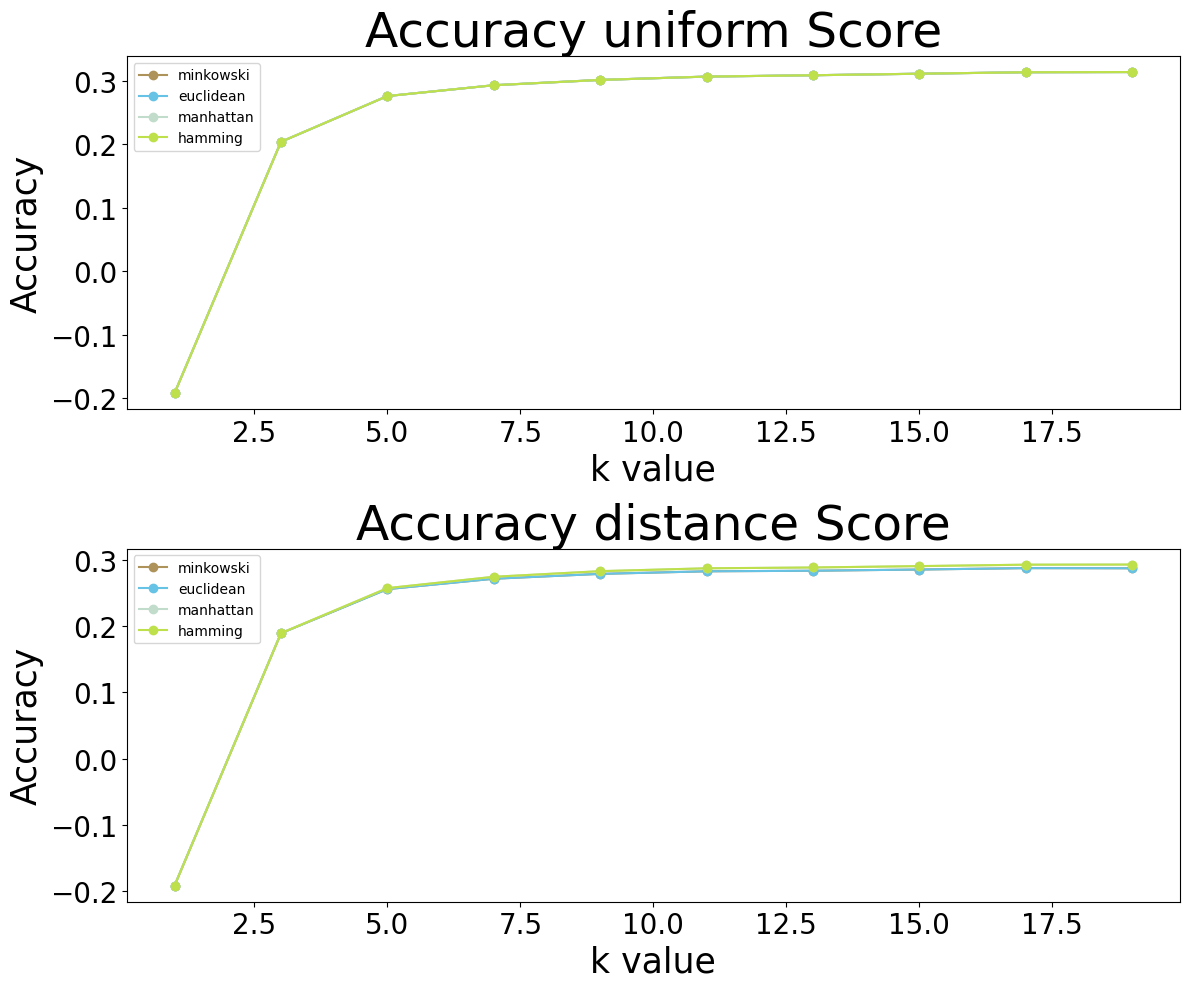

In [20]:
GridSearchCV_Accuracy_graph(cv_result)

## 2-5 Evaluation

grid params에 2가지 weight(uniform, distance)와 각 weight에 따른 4가지 metric(minkowski, euclidean, manhattan, hamming)를 subplot을 이용해 그려보았다. 그 결과, 전반적으로 uniform에서의 accuracy값이 더 크게 나옴을 확인해볼 수 있고 해당 uniform에서의 4가지 metric에 대한 그래프는 k에 따라 값들이 전부 일정함을 확인할 수 있다. 따라서 최종 결과는 weight = uniform, metric = minkowski(기본값, 4가지중 어떤 것이어도 상관없음), k = 19로 GridSearchCV에서의 결과와 비교해보면 일치함을 확인할 수 있다.

추가적으로 전반적인 정확도 값 자체가 낮게 나왔음을 알 수 있다.
설명변수 자체가 범주형 변수이며 이를 One=Hot-Encoding 방식으로 나누어주었기 때문에 많은 차원이 발생하였고 아무래도 많은 차원을 가지고 있는 변수들에 대해 knn regression을 적용하면 높은 정확도를 보이기 어렵다.
따라서 적절한 차원 축소, 혹은 knn이 아닌 다른 알고리즘을 통해서 높은 정확도를 보이는 모델을 선정할 필요가 있다고 판단된다.